# Import Modules

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpl.rcParams['figure.dpi'] = 400
sns.set(context='paper', style='dark')

# Load Data File

In [3]:
phase_df = pd.read_csv('data/compound_phase_data.tsv', sep='\t')
len(phase_df)

C:\Users\Shantanu Shetty\AppData\Local\Temp\ipykernel_16144\471742512.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  phase_df = pd.read_csv('data/compound_phase_data.tsv', sep='\t')


2354965

In [4]:
phase_df.head(2)

,pref_name,molregno,chembl_id,phase,indication
0,NaN,1,CHEMBL6329,NaN,NaN
1,NaN,2,CHEMBL6328,NaN,NaN


In [5]:
phase_df['phase'] = phase_df['phase'].fillna('Preclinical')

In [6]:
phase_df['phase'].value_counts()

phase
Preclinical      2337113
Unknown             7825
Approved            4194
Phase 2             2474
Phase 3             1735
Phase 1             1595
Early Phase 1         29
Name: count, dtype: int64

In [9]:
#21857225 unique Inchi per year from EDA.txt file merged with 2327928 chembl_id file,dropping duplicates wrt whole datframe got 10695984
surechem_df = pd.read_csv('data/scheml_chembl_merged.csv', sep=',')
surechem_df.head(2) 

,SureChEMBL_ID,InChIKey,chembl_id,clinical_phase
0,SCHEMBL4,FAKRSMQSSFJEIM-RQJHMYQMSA-N,CHEMBL1560,4.0
1,SCHEMBL9,OYFJQPXVCSSHAI-QFPUQLAESA-N,CHEMBL1200659,4.0


In [10]:
len(surechem_df) #clinical phase not considered from this file because it also has -1.0

10695984

In [11]:
schembl_df = surechem_df[['SureChEMBL_ID', 'InChIKey', 'chembl_id']]
schembl_df.head(2)

,SureChEMBL_ID,InChIKey,chembl_id
0,SCHEMBL4,FAKRSMQSSFJEIM-RQJHMYQMSA-N,CHEMBL1560
1,SCHEMBL9,OYFJQPXVCSSHAI-QFPUQLAESA-N,CHEMBL1200659


In [12]:
len(schembl_df)

10695984

In [13]:
#merged with phase infromation datframe

merged_df = pd.merge(schembl_df, phase_df, how="left", on=["chembl_id"])
merged_df.drop_duplicates(keep='first', inplace=True)
merged_df.head(2)

,SureChEMBL_ID,InChIKey,chembl_id,pref_name,molregno,phase,indication
0,SCHEMBL4,FAKRSMQSSFJEIM-RQJHMYQMSA-N,CHEMBL1560,CAPTOPRIL,444750.0,Approved,Enzyme Inhibitor (angiotensin-converting); Ant...
1,SCHEMBL9,OYFJQPXVCSSHAI-QFPUQLAESA-N,CHEMBL1200659,ENALAPRIL MALEATE,674610.0,Approved,Antihypertensive


In [14]:
len(merged_df)

10695984

In [15]:
merged_df.dropna(subset = ['chembl_id'], inplace=True)
merged_df.reset_index(drop=True, inplace=True)

In [16]:
len(merged_df)

318951

In [17]:
merged_df.dropna(subset = ['phase'], inplace=True)
merged_df.reset_index(drop=True, inplace=True)

In [18]:
len(merged_df)

318951

In [19]:
f = pd.DataFrame(merged_df['phase'].value_counts())
f.reset_index(level=0, inplace=True)
f.columns = ['Phase', 'Count']
f

,Phase,Count
0,Preclinical,308109
1,Unknown,5092
2,Approved,2938
3,Phase 2,1284
4,Phase 3,864
5,Phase 1,652
6,Early Phase 1,12


# Visualisation

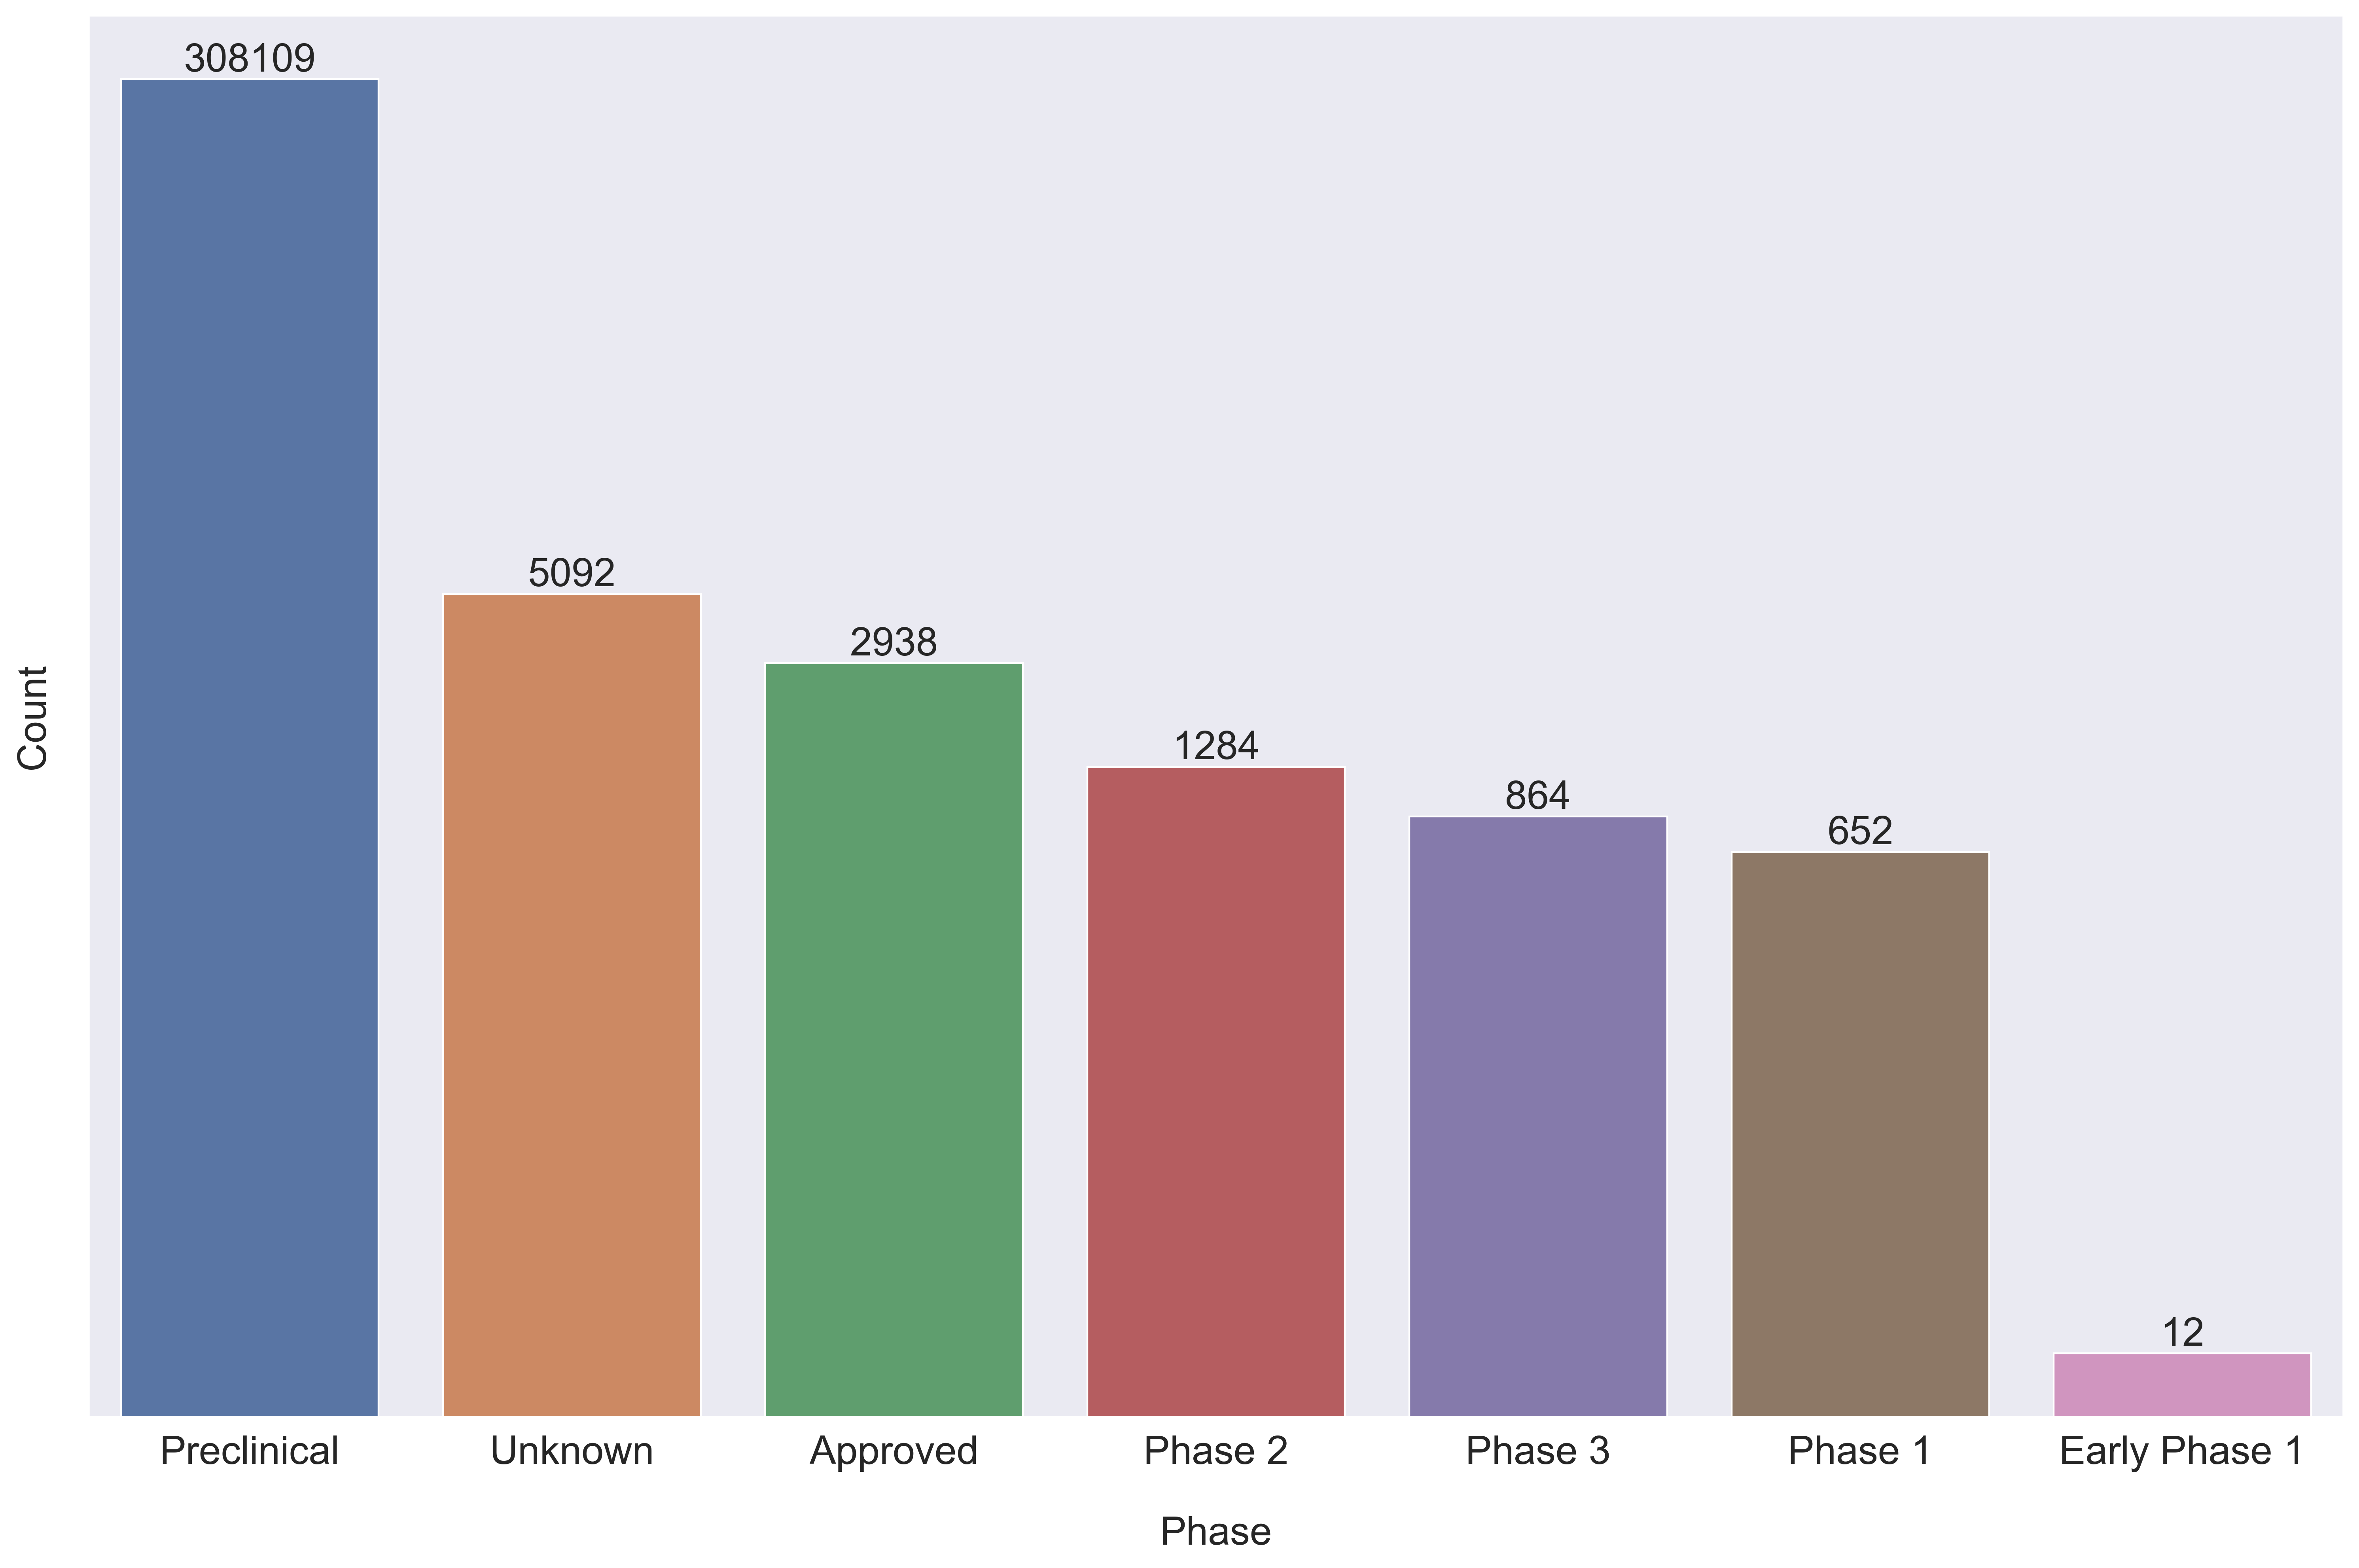

In [20]:
plt.figure(figsize = (15, 10))

ax = sns.barplot(data=f, x= f['Phase'], y= f['Count'], log=True)
ax.bar_label(ax.containers[0], fontsize=18)
plt.xticks(fontsize=18)
plt.yticks([])
ax.set_ylabel('Count', labelpad=10, fontsize=18)
ax.set_xlabel('Phase', rotation=0, labelpad=20, fontsize=18)

 
plt.tight_layout()
plt.show()

In [21]:
f['percent'] = (f['Count'] / f['Count'].sum()) * 100

In [22]:
f

,Phase,Count,percent
0,Preclinical,308109,96.600732
1,Unknown,5092,1.596483
2,Approved,2938,0.921145
3,Phase 2,1284,0.402570
4,Phase 3,864,0.270888
5,Phase 1,652,0.204420
6,Early Phase 1,12,0.003762


In [23]:
f['percent']. round(2)

0    96.60
1     1.60
2     0.92
3     0.40
4     0.27
5     0.20
6     0.00
Name: percent, dtype: float64